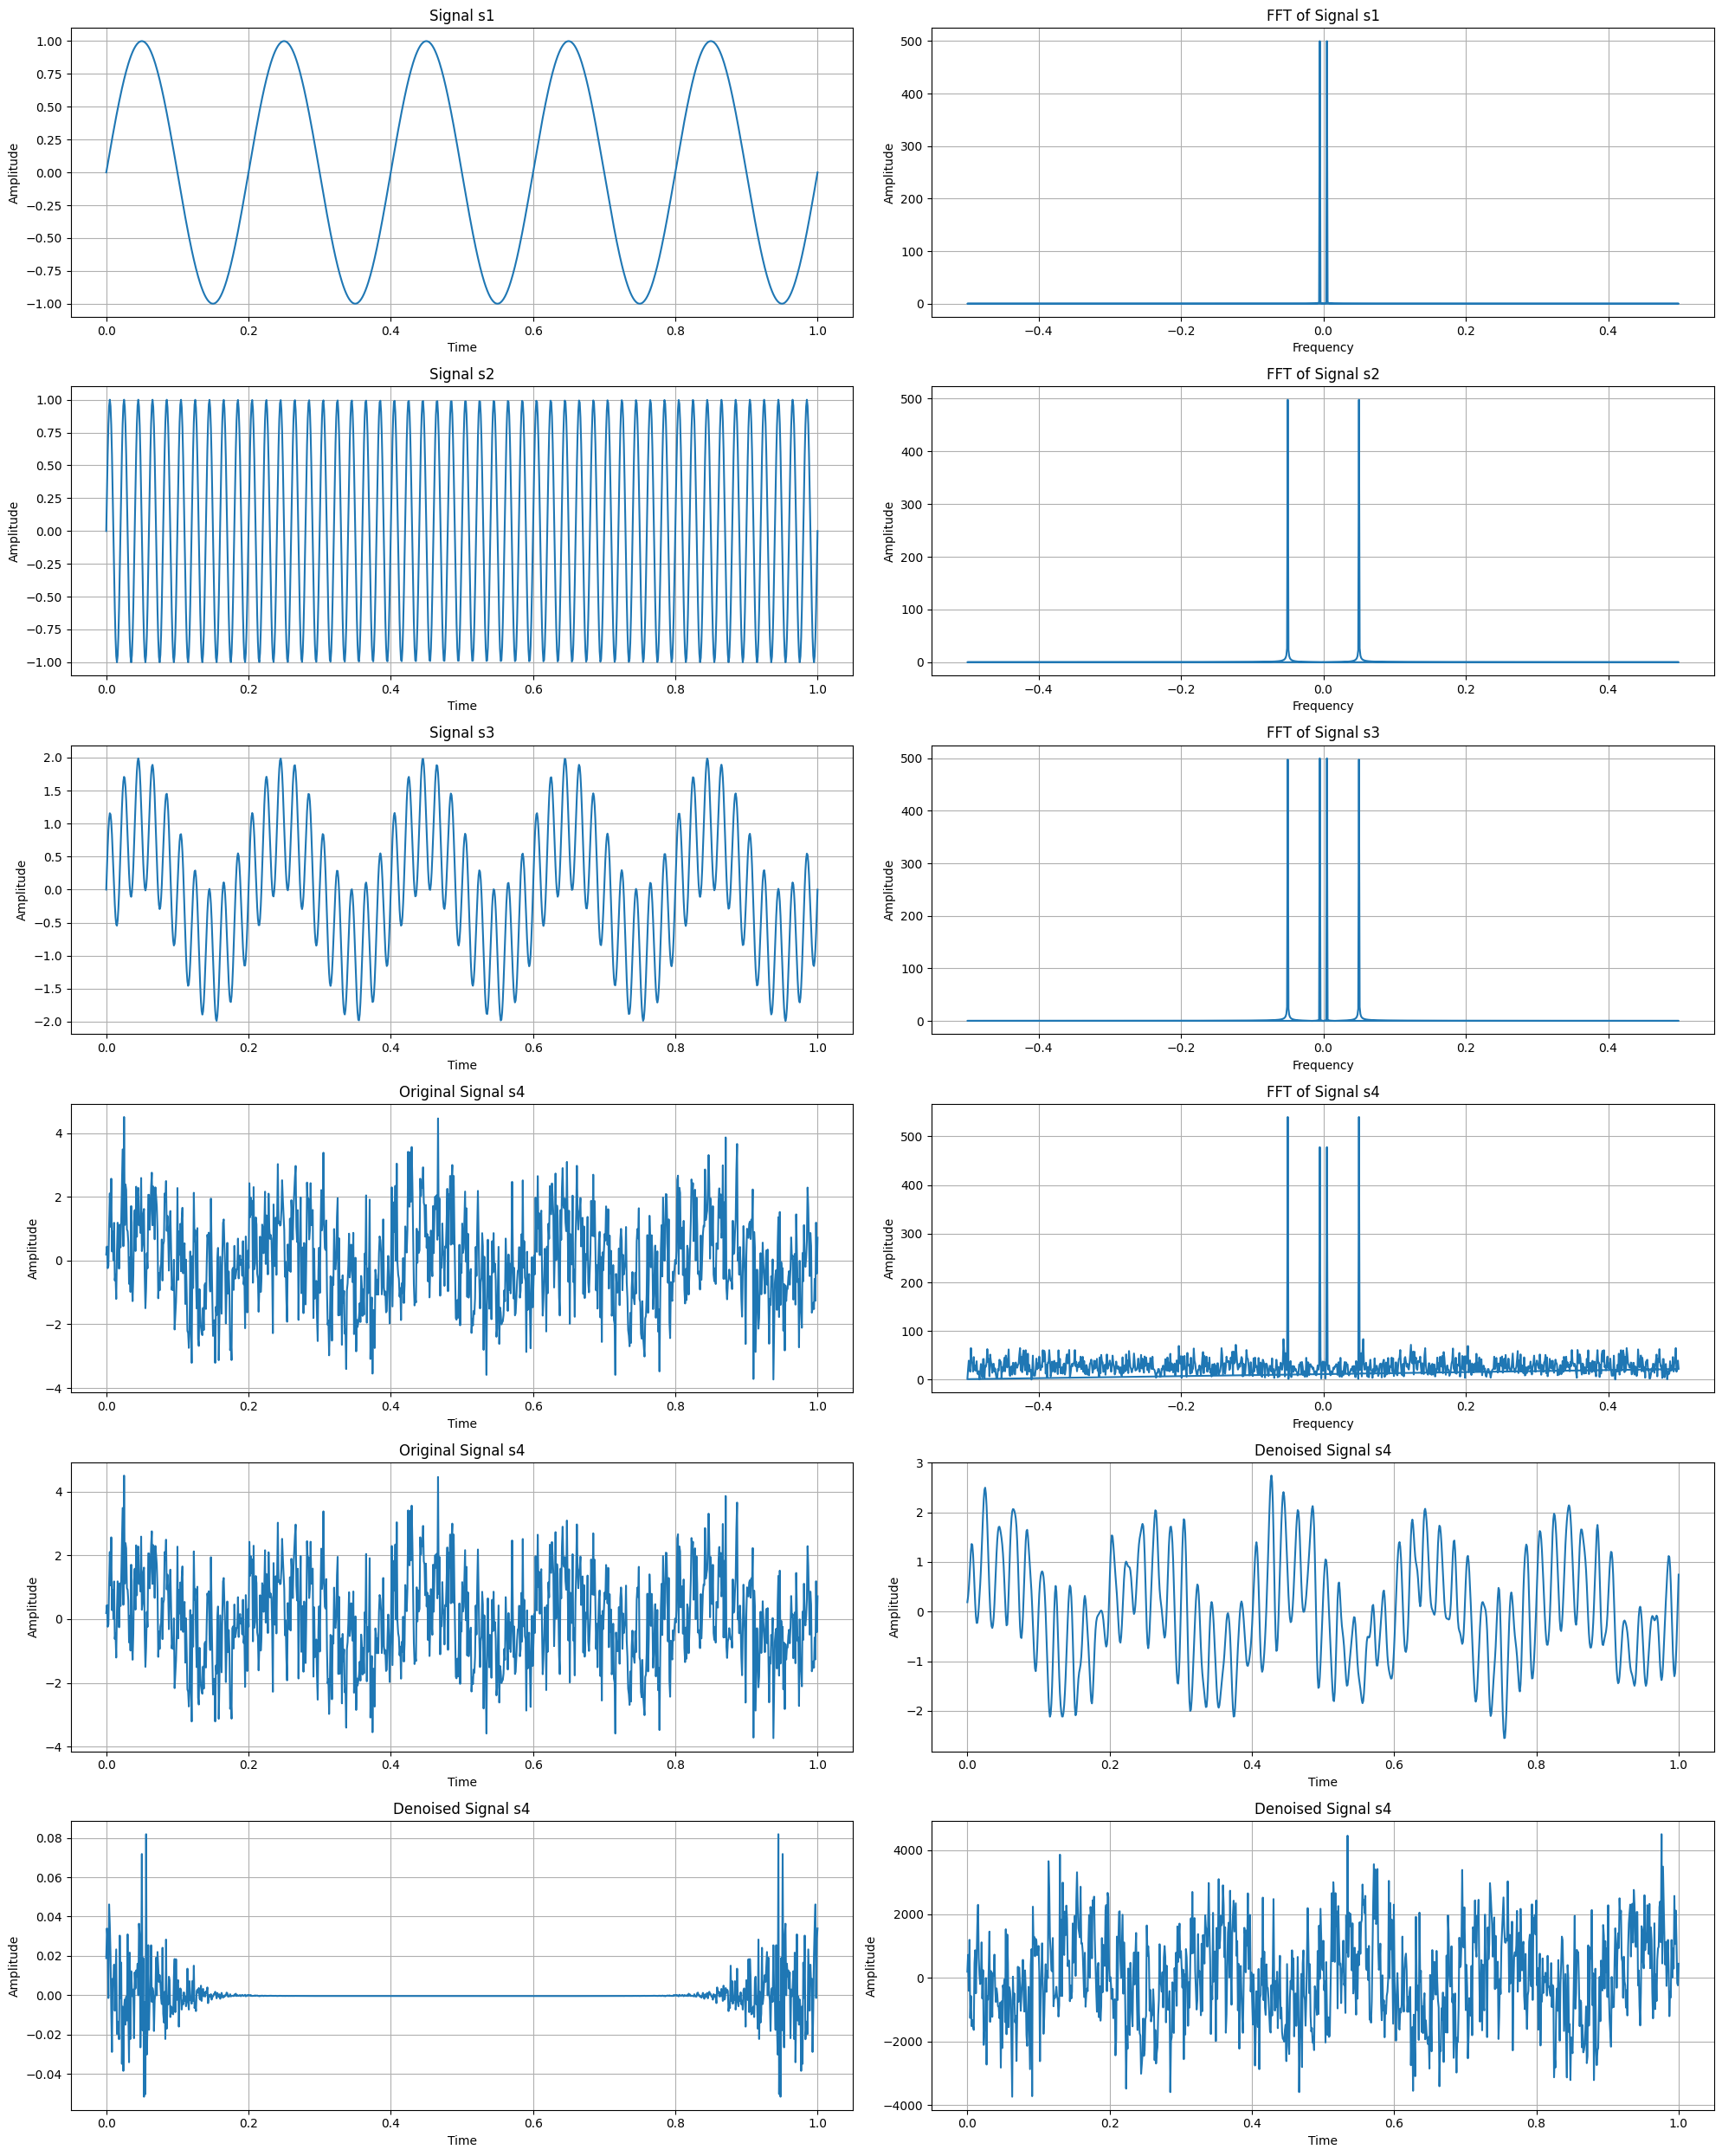

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Generate time axis
t = np.linspace(0, 1, 1000)

# Generate sine signals
s1 = np.sin(2 * np.pi * 5 * t)  # Sine signal 1
s2 = np.sin(2 * np.pi * 50 * t)  # Sine signal 2

# Calculate s3 = s1 + s2
s3 = s1 + s2

# Add random noise to s3 to get s4
noise = np.random.normal(0, 1, len(s3))  # Generating random noise
s4 = s3 + noise

# Compute FFT of signals
fft_s1 = np.fft.fft(s1)
fft_s2 = np.fft.fft(s2)
fft_s3 = np.fft.fft(s3)
fft_s4 = np.fft.fft(s4)
fft_s5 = np.fft.fft(fft_s4)


# Frequency axis
freq_axis = np.fft.fftfreq(len(s1))

# Design Butterworth filter
order = 3  # Filter order
cutoff_freq = 0.1  # Cutoff frequency
b, a = butter(order, cutoff_freq, fs=1.0, btype='low')

# Apply Butterworth filter to denoise s4
denoised_s4 = filtfilt(b, a, s4)
denoised_s4_time = np.fft.ifft(denoised_s4)

# Plotting the subplots
fig, axs = plt.subplots(6, 2, figsize=(20, 25))

# Plot s1
axs[0, 0].plot(t, s1)
axs[0, 0].set_title('Signal s1')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].grid(True)

# Plot s2
axs[1, 0].plot(t, s2)
axs[1, 0].set_title('Signal s2')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Amplitude')
axs[1, 0].grid(True)

# Plot s3
axs[2, 0].plot(t, s3)
axs[2, 0].set_title('Signal s3')
axs[2, 0].set_xlabel('Time')
axs[2, 0].set_ylabel('Amplitude')
axs[2, 0].grid(True)

# Plot FFT of s1
axs[0, 1].plot(freq_axis, np.abs(fft_s1))
axs[0, 1].set_title('FFT of Signal s1')
axs[0, 1].set_xlabel('Frequency')
axs[0, 1].set_ylabel('Amplitude')
axs[0, 1].grid(True)

# Plot FFT of s2
axs[1, 1].plot(freq_axis, np.abs(fft_s2))
axs[1, 1].set_title('FFT of Signal s2')
axs[1, 1].set_xlabel('Frequency')
axs[1, 1].set_ylabel('Amplitude')
axs[1, 1].grid(True)

# Plot FFT of s3
axs[2, 1].plot(freq_axis, np.abs(fft_s3))
axs[2, 1].set_title('FFT of Signal s3')
axs[2, 1].set_xlabel('Frequency')
axs[2, 1].set_ylabel('Amplitude')
axs[2, 1].grid(True)

# Plot original signal s4
axs[3, 0].plot(t, s4)
axs[3, 0].set_title('Original Signal s4')
axs[3, 0].set_xlabel('Time')
axs[3, 0].set_ylabel('Amplitude')
axs[3, 0].grid(True)

# Plot FFT of s4
axs[3, 1].plot(freq_axis, np.abs(fft_s4))
axs[3, 1].set_title('FFT of Signal s4')
axs[3, 1].set_xlabel('Frequency')
axs[3, 1].set_ylabel('Amplitude')
axs[3, 1].grid(True)

# Plot original signal s4
axs[4, 0].plot(t, s4)
axs[4, 0].set_title('Original Signal s4')
axs[4, 0].set_xlabel('Time')
axs[4, 0].set_ylabel('Amplitude')
axs[4, 0].grid(True)

# Plot denoised signal s4
axs[4, 1].plot(t, denoised_s4)
axs[4, 1].set_title('Denoised Signal s4')
axs[4, 1].set_xlabel('Time')
axs[4, 1].set_ylabel('Amplitude')
axs[4, 1].grid(True)

# Plot denoised signal s5
axs[5, 1].plot(t, fft_s5)
axs[5, 1].set_title('Denoised Signal s4')
axs[5, 1].set_xlabel('Time')
axs[5, 1].set_ylabel('Amplitude')
axs[5, 1].grid(True)

# Plot denoised signal  ift s4 inverse
axs[5, 0].plot(t, denoised_s4_time)
axs[5, 0].set_title('Denoised Signal s4')
axs[5, 0].set_xlabel('Time')
axs[5, 0].set_ylabel('Amplitude')
axs[5, 0].grid(True)

# Display the plots
plt.tight_layout()
plt.show()
